<a href="https://colab.research.google.com/github/muzammil-max/ML-and-DL-Journey/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Install Scklearn

In [ ]:
!pip install -q scikit-learn

In [ ]:
!pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully unin

In [ ]:
import numpy as np #Provides support for multi dimensional array like tensors and performing calculations (high level) that includes dot product , cross product , matrix operations
import pandas as pd #Used for Data manipulation and analysis.Used to load training dataset into model
import matplotlib.pyplot as plt # Visualization
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as tf
import tensorflow as tf

In [ ]:
#loading data set (How many ppl survived in titanic incident)

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head()) #it shows us the first 5 data frames in our data set
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

#now if we print the training dataset again we will see that survived columns is vanished this is because its pop in to y_train
# print(dftrain.head())
# print("-------------------------")
# print(y_train)

#we use .loc method to locate the row in dataset
print(dftrain.loc[0],y_train.loc[0])

# Now if we want to find age we do this
print(dftrain['age']) #it gives us all age in dataset we can put another columns values too and this is how we gonna locate things in dataset.

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0
0      22.0
1      38.0
2      26.0
3      3

In [ ]:
#Method 1 .head()
#gives us the first 5 entries in dataset in a formatted way.
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
#method 02 .describe()
#This methods tells us the statistical data about our dataset like standard deviation , upper quartile , lower quartile , min and max.

dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
#method 03 .shape()
#This tells us about the rows and columns (tensors) in our dataset
# (rows,columns)

dftrain.shape

(627, 9)

In [ ]:
#Example of .head()

y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

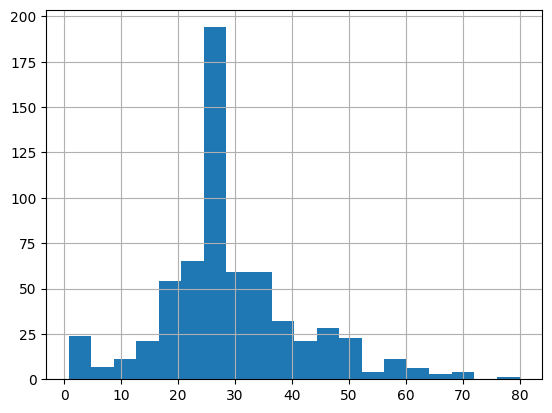

In [ ]:
#plotting graphs using pandas to analyze information

dftrain.age.hist(bins=20) #it plots the histograms in 20 intervals  and will use age columns


### Training vs Testing Data
You may have noticed that we loaded **two different datasets** above. This is because when we train models, we need two sets of data: **training and testing**.

The **training** data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The **testing** data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.



In [ ]:
# # Feature columns
# # OUr data set has two type of info
# one is catagorical and one is numerical for eg sex is categorical while age is numerical
# our AI model works in numerical values so we need to normalize the data into numerical ones like male=0 and female = 1 and so on.
# Tensorflow helps converting it  into numerical!

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone'] #these are the columns in our dataset that has text values
NUMERIC_COLUMNS = ['age', 'fare'] #while these are the numerical ones

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocab = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab)) #This maps all the catergorical values in caterogical columns and assigns them a integer the work is handled by Tensor flow


# for feature_name in NUMERIC_COLUMNS:

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32)) #this tells the tensor flow that this array already contains the numeric values.


print(feature_columns)



Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

### Training Model

[Detailed Guide](https://grok.com/chat/bc02d5d7-e338-4624-9cf1-07ece483025a)

Epoch

Epoch means how many times the dataset is streamed to our model.
Number of Epochs determines how many times our model will see the dataset
for eg if epoch is 10 then our model will see dataset 10 times.

This is the best way because instead of steaming the whole dataset into our model we stream it in bactches in epochs.

In [ ]:
#Setting up pipeline

#we will now setting up pipeline that will stream the data to model


def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32): #we setup the input function that takes datadf from dataset , label_df is the data the model predicts , num_epochs is the no of times dataset will be streamline to model and shuffle is to randomise the order of data and batch the nonof elements model will get from dataset.
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))  #this converts the data_df and lebl_df into tensrflow object
    if shuffle:
      ds = ds.shuffle(1000) #shuffle the data
    ds = ds.batch(batch_size).repeat(num_epochs) #this breaks down the data into batches and streams into model
    return ds #it returns a batch
  return input_function #returns the object

train_input_fn = make_input_fn(dftrain,y_train) #we call the function with parameters dftrain and y_train these are the datasets we loaded in above cells this trains the model
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False) #THis is the input funvtion that feeds test data

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns) #it creates a relationship between the trainiing data and the data our model predicted. This will help the model to predict the next data.


linear_est.train(train_input_fn) #training model

result = linear_est.evaluate(eval_input_fn) #model will now use the testing dATaset and predict

clear_output()

print(result['accuracy']) #this will give us the accuracy




0.7348485


### What does `.loc` mean?

In pandas, `.loc` is a label-based data selecting method. This means that you can select data from a DataFrame using the row and column labels.

The general syntax is `df.loc[row_label, column_label]`.

In the case of `dfeval.loc[0]`, we are selecting the row with the label `0` from the `dfeval` DataFrame. Since we haven't specified any column labels, it returns all the columns for that row.

You can also use `.loc` to select:
* **A specific cell:** `dfeval.loc[0, 'age']` would give you the age of the passenger in the first row.
* **Multiple rows:** `dfeval.loc[[0, 1, 2]]` would give you the first three rows.
* **A range of rows:** `dfeval.loc[0:5]` would give you the rows from index 0 to 5 (inclusive).
* **Specific rows and columns:** `dfeval.loc[[0, 1], ['sex', 'age']]` would give you the sex and age for the first two passengers.

In [ ]:
result=list(linear_est.predict(eval_input_fn)) #this tells is the logistics of prediction which is stored in dict
# print(result)

#if we do this
print(dfeval.loc[43
                 ])
print(result[43]['probabilities'][1]) #this tells us that not suriviing probalbities is 91% because 0 represent not survive and 1 represent survive.

sex                          male
age                          28.0
n_siblings_spouses              0
parch                           0
fare                       25.925
class                       First
deck                      unknown
embark_town           Southampton
alone                           y
Name: 43, dtype: object
0.267356
